In [ ]:
test = ('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100')
from collections import Counter

class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))
    hashabledict(dict(Counter(
frequency_dict = test)))

cache = {(frequency_dict, 1)}
print(cache)

{({'A100': 16, 'V100': 16}, 1)}


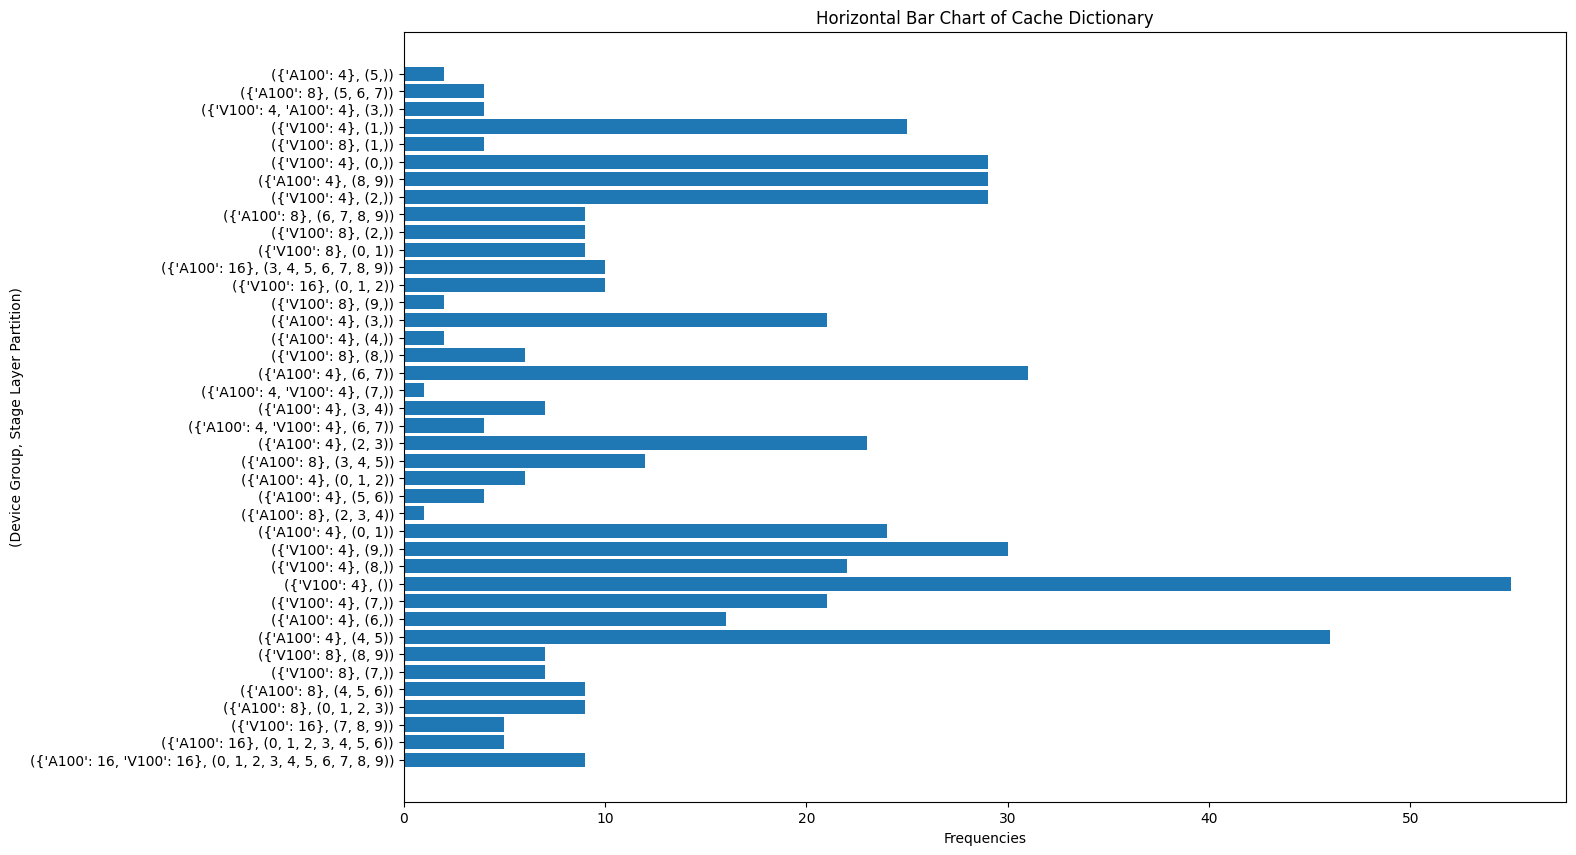

In [27]:
cache = {(
    hashabledict({'A100': 16, 'V100': 16}), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
): 9, (
    hashabledict({'A100': 16}), (0, 1, 2, 3, 4, 5, 6)
): 5, (
    hashabledict({'V100': 16}), (7, 8, 9)
): 5, (
    hashabledict({'A100': 8}), (0, 1, 2, 3)
): 9, (
    hashabledict({'A100': 8}), (4, 5, 6)
): 9, (
    hashabledict({'V100': 8}), (7,)
): 7, (
    hashabledict({'V100': 8}), (8, 9)
): 7, (
    hashabledict({'A100': 4}), (4, 5)
): 46, (
    hashabledict({'A100': 4}), (6,)
): 16, (
    hashabledict({'V100': 4}), (7,)
): 21, (
    hashabledict({'V100': 4}), ()
): 55, (
    hashabledict({'V100': 4}), (8,)
): 22, (
    hashabledict({'V100': 4}), (9,)
): 30, (
    hashabledict({'A100': 4}), (0, 1)
): 24, (
    hashabledict({'A100': 8}), (2, 3, 4)
): 1, (
    hashabledict({'A100': 4}), (5, 6)
): 4, (
    hashabledict({'A100': 4}), (0, 1, 2)
): 6, (
    hashabledict({'A100': 8}), (3, 4, 5)
): 12, (
    hashabledict({'A100': 4}), (2, 3)
): 23, (
    hashabledict({'A100': 4, 'V100': 4}), (6, 7)
): 4, (
    hashabledict({'A100': 4}), (3, 4)
): 7, (
    hashabledict({'A100': 4, 'V100': 4}), (7,)
): 1, (
    hashabledict({'A100': 4}), (6, 7)
): 31, (
    hashabledict({'V100': 8}), (8,)
): 6, (
    hashabledict({'A100': 4}), (4,)
): 2, (
    hashabledict({'A100': 4}), (3,)
): 21, (
    hashabledict({'V100': 8}), (9,)
): 2, (
    hashabledict({'V100': 16}), (0, 1, 2)
): 10, (
    hashabledict({'A100': 16}), (3, 4, 5, 6, 7, 8, 9)
): 10, (
    hashabledict({'V100': 8}), (0, 1)
): 9, (
    hashabledict({'V100': 8}), (2,)
): 9, (
    hashabledict({'A100': 8}), (6, 7, 8, 9)
): 9, (
    hashabledict({'V100': 4}), (2,)
): 29, (
    hashabledict({'A100': 4}), (8, 9)
): 29, (
    hashabledict({'V100': 4}), (0,)
): 29, (
    hashabledict({'V100': 8}), (1,)
): 4, (
    hashabledict({'V100': 4}), (1,)
): 25, (
    hashabledict({'V100': 4, 'A100': 4}), (3,)
): 4, (
    hashabledict({'A100': 8}), (5, 6, 7)
): 4, (
    hashabledict({'A100': 4}), (5,)
): 2}

import matplotlib.pyplot as plt

# Extract keys and values from the dictionary
keys = list(cache.keys())
values = list(cache.values())

# Create a horizontal bar chart
plt.figure(figsize=(15, 10))
plt.barh(range(len(keys)), values, tick_label=[str(k) for k in keys])
plt.yticks(rotation=0)
plt.ylabel('(Device Group, Stage Layer Partition)')
plt.xlabel('Frequencies')
plt.title('Horizontal Bar Chart of Cache Dictionary')
plt.show()

In [26]:
print(cache[hashabledict({'A100': 16}), (0, 1, 2, 3, 4, 5, 6)])

5
